In [1]:
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [10]:
# file_path = '/Users/user/Desktop/chords_recogn/CE200_sample/CE200_sample/14/ground_truth.txt'
file_path = 'CE200_sample/CE200_sample/14/ground_truth.txt'
with open(file_path, 'r') as f:
    chords = []
    for line in f:
        chords.append(line.split())

In [16]:
chords # 這條歌曲的真實和弦

[['0.000000', '0.690180', 'N'],
 ['0.690180', '4.342384', 'D:maj'],
 ['4.342384', '8.886070', 'A:maj'],
 ['8.887888', '12.950465', 'B:min'],
 ['12.949339', '16.986102', 'G:maj'],
 ['16.982740', '21.069668', 'D:maj'],
 ['21.069668', '24.923174', 'G:maj'],
 ['24.928047', '29.179285', 'B:min'],
 ['29.181264', '32.975276', 'G:maj'],
 ['32.976736', '37.097186', 'D:maj'],
 ['37.116358', '41.123237', 'G:maj'],
 ['41.123237', '45.168460', 'B:min'],
 ['45.168460', '49.079481', 'A:maj'],
 ['49.079481', '51.092507', 'G:maj'],
 ['51.092507', '53.143876', 'A:maj'],
 ['53.140165', '55.156901', 'B:min'],
 ['55.156901', '57.131583', 'D:maj'],
 ['57.126364', '59.240467', 'G:maj'],
 ['59.243436', '61.272665', 'A:maj'],
 ['61.265144', '63.209004', 'B:min'],
 ['63.209004', '64.225102', 'G:maj'],
 ['64.221416', '65.241201', 'A:maj'],
 ['65.241201', '69.248080', 'D:maj'],
 ['69.248080', '73.293303', 'A:maj'],
 ['73.293303', '77.357698', 'B:min'],
 ['77.357698', '79.332380', 'G:maj'],
 ['79.332380', '81.3645

In [11]:
file_path = 'CE200_sample/CE200_sample/14/feature.json'
with open(file_path, 'r') as f:
    d = f.read()
    js = json.loads(d)

In [22]:
# chroma_stft總共有12個維度(半音)：C,C#,D,D#,E,...,G,G#
# 每個半音都有bin=10186個長度，代表的是在每個 bin 中的能量大小([0,1])
# bin~=整首歌長 236.50175s / (hop_length=512/sr=22050)
chroma_stft = js['chroma_stft'] # feature: chroma_stft
print(len(chroma_stft)) 
print(len(chroma_stft[0]))
print(len(chroma_stft[1]))
print(len(chroma_stft[11]))

12
10186
10186
10186


In [24]:
chroma_stft[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002021562308073044,
 0.970880389213562,
 0.6199561953544617,
 0.657059371471405,
 1.0,
 0.3643862307071686,
 0.16137047111988068,
 0.31443655490875244,
 0.32370761036872864,
 0.3846582770347595,
 0.5085471272468567,
 0.55179762840271,
 0.41507020592689514,
 0.46583864092826843,
 0.5420874953269958,
 0.5562424659729004,
 0.22776050865650177,
 0.07571692764759064,
 0.0715947076678276,
 0.07013868540525436,
 0.07060852646827698,
 0.10690870881080627,
 0.07873919606208801,
 0.05196991190314293,
 0.06874551624059677,
 0.05546467751264572,
 0.1252484917640686,
 0.11014626920223236,
 0.18121622502803802,
 0.10757549852132797,
 0.08770902454853058,
 0.0931999459862709,
 0.07370766252279282,
 0.035703789442777634,
 0.07265187054872513,
 0.14635387063026428,
 0.4220101833343506,
 0.5333898663520813,
 0.1325969398021698,
 0.2025950998

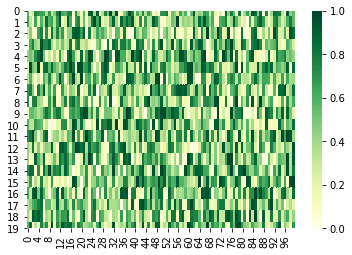

In [56]:
#### import numpy as np
import seaborn as sns # 用來畫 heatmap, 輸入要是 np.array
import matplotlib.pylab as plt

uniform_data = np.random.rand(20, 100)
ax = sns.heatmap(uniform_data, vmin=0, vmax=1, cmap="YlGn")
plt.show()

In [37]:
np.array([chroma_stft[0]])

array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
uniform_data

array([[0.28648546, 0.74045573, 0.73093892, 0.78519758, 0.73938745,
        0.98403265, 0.45491169, 0.94090613, 0.54544703, 0.91605578,
        0.24429864, 0.89356035],
       [0.74785869, 0.76931851, 0.47756192, 0.03601161, 0.14175199,
        0.59263844, 0.8480721 , 0.43646494, 0.80685511, 0.81145549,
        0.72346135, 0.32488684],
       [0.39625803, 0.95165772, 0.70392552, 0.97313172, 0.70556127,
        0.54056606, 0.44533293, 0.95204065, 0.03652473, 0.92375401,
        0.49311455, 0.93878039],
       [0.4972971 , 0.15533   , 0.2882602 , 0.5424185 , 0.71155708,
        0.23933709, 0.72019847, 0.17281831, 0.07146743, 0.90307792,
        0.07876717, 0.18340052],
       [0.06029888, 0.38208988, 0.64093287, 0.67496077, 0.92254294,
        0.29543668, 0.46833455, 0.14552248, 0.73038165, 0.99998755,
        0.34676677, 0.72197784],
       [0.23245256, 0.12337736, 0.94626253, 0.32190857, 0.24167284,
        0.36417234, 0.99874832, 0.65363425, 0.30745471, 0.66519006,
        0.20638799,